# K Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random, generate_random_data, generate_graph
from sklearn.model_selection import train_test_split
from collections import defaultdict
from typing import List

In [2]:
df = generate_random_data.get_knn_kmeans_data(210)
df.head(10)

,Attractiveness Scale,Creativity Scale,Career
0,0.432635,0.171952,OnlyFans
1,0.152094,0.514559,Artist
2,0.895790,0.484410,Model
3,0.366516,0.551488,Artist
4,0.762690,0.301120,OnlyFans
5,0.115556,0.718573,Artist
6,0.133499,0.632723,Artist
7,0.789785,0.043173,OnlyFans
8,0.658591,0.812057,Model
9,0.559758,0.694345,Model


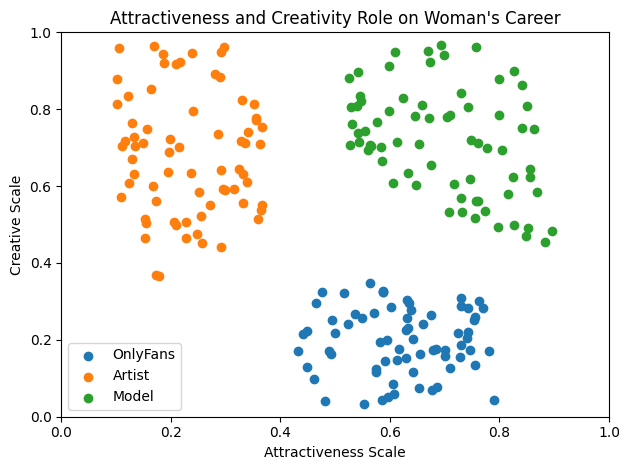

In [3]:
generate_graph.show_knn_kmeans_data(df)

In [10]:
class WomansCareerKMeansClustering:
    def __init__(self, k):
        self.class_count = defaultdict(int)
        self.X_train = None
        self.center_clusters = None
        self.k = k
    
    def _get_center_clusters(self, X: np.ndarray) -> np.ndarray:
        center_clusters = []
        for _ in range(self.k):
            cluster_point = []
            for feature in X.T:
                feature_min = np.min(feature)
                feature_max = np.max(feature)
                cluster_point.append((feature_max - feature_min) * random.random() + feature_min)
            center_clusters.append(cluster_point)
        return np.array(center_clusters)
    
    def _get_mean_center_clusters(self, X: np.ndarray, point_classes: np.ndarray) -> np.ndarray:
        center_clusters = []
        for class_i in set(point_classes):
            center_clusters.append(np.mean(X[point_classes == class_i], axis=0))
        return np.array(center_clusters)

    def fit(self, X: np.ndarray) -> None:
        center_clusters = self._get_center_clusters(X)
        previous_center_clusters = None
        while previous_center_clusters is None or np.sum(previous_center_clusters != center_clusters) > 0:
            point_classes = []
            for Xi in X:
                euclidean_distance = np.sqrt(np.sum((center_clusters - Xi) ** 2, axis=1))
                point_classes.append(np.argmin(euclidean_distance))
            point_classes = np.array(point_classes)
            previous_center_clusters = center_clusters.copy()
            center_clusters = self._get_mean_center_clusters(X, point_classes)
        self.center_clusters = center_clusters

    def predict(self, X: np.ndarray) -> List:
        y_predict = []
        for Xi in X:
            euclidean_distance = np.sqrt(np.sum((self.center_clusters - Xi) ** 2, axis=1))
            y_predict.append(np.argmin(euclidean_distance))

        return y_predict


In [13]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
my_model = WomansCareerKMeansClustering(3)
my_model.fit(X_train)
y_predict = my_model.predict(X_test)

In [42]:
def evaluate_accuracy(y_predict: np.ndarray, y_test: np.ndarray) -> float:
    evaluation_df = pd.DataFrame({"Prediction": y_predict, "Actual": y_test})
    calculation_df = evaluation_df.groupby(["Prediction", "Actual"]).size().reset_index(name="Count")
    calculation_df = calculation_df.sort_values(by=["Prediction", "Count"], ascending=False).drop_duplicates("Actual")
    get_actual_prediction = lambda prediction: calculation_df.loc[calculation_df["Prediction"] == prediction, "Actual"].values[0]
    evaluation_df["Prediction"] = evaluation_df["Prediction"].map(get_actual_prediction)
    return sum(evaluation_df["Prediction"] == evaluation_df["Actual"]) / len(evaluation_df)
evaluate_accuracy(y_predict, y_test)

1.0

In [41]:
from sklearn.cluster import KMeans

sklearn_model = KMeans(3)
sklearn_model.fit(X_train)
y_predict = sklearn_model.predict(X_test)
evaluate_accuracy(y_predict, y_test)

1.0